**Group information**

| Family name | First name | Email address |
| ----------- | ---------- | ------------- |
|             |            |               |
|             |            |               |
|             |            |               |

# Network - Solutions

This tutorial explores how to implement a simple neural network to predict the likelihood of loan default from borrower loan characteristics. The labelled dataset contains 100,000 observations and 16 predictors (e.g. income, credit score). The response is a binary variable indicating whether the borrower defaulted on the loan.

In [1]:
# Packages
import inspect
import numpy as np
import pandas as pd
import shutil
import os

from matplotlib import pyplot
from sklearn import metrics, model_selection, preprocessing
from tensorflow.keras import callbacks, layers, losses, models, optimizers, regularizers
from urllib import request

# Utilities
# os.chdir(f"{os.path.expanduser('~')}/Desktop")

def download_data():
    '''Downloads data folder'''
    request.urlretrieve('https://www.dropbox.com/scl/fo/enlhq3he4vrxtsw9goup5/AB5uNqD0dwdTG2fO8orV02U?rlkey=oan5la71do06r0gpe5ea5ii5b&dl=1', 'data.zip')
    shutil.unpack_archive('data.zip', 'data')
    os.remove('data.zip')
    os.chdir('data')

def plot_history(history, metric='loss', validation=False):
    '''Plots the training history for a given metric'''
    fig, ax = pyplot.subplots(1, figsize=(5,5))
    ax.plot(history[metric], label=f'Validation {metric}')
    if validation:
        ax.plot(history[f'val_{metric}'], label=f'Validation {metric}')
    ax.set_title(f'Model {metric}')
    ax.set_ylabel(metric.title())
    ax.set_xlabel('Epoch')
    ax.legend(['Training', 'Validation'])
    pyplot.tight_layout()
    pyplot.show()

1. Load the `X` and `y` datasets and produce some descriptive statistics.

In [2]:
# Loads data
# download_data() # On first run
X = pd.read_csv('X.csv', index_col='loan_id')
y = pd.read_csv('y.csv', index_col='loan_id')

ContentTooShortError: <urlopen error retrieval incomplete: got only 9633876 out of 9707130 bytes>

In [ ]:
# Descriptive statistics
y.value_counts()
X.head()
X.describe()
[print(f'{x.value_counts()}\n') for _, x in X.items() if x.dtype == 'object']

education
high_school    25698
bachelor       25392
master         24706
phd            24204
Name: count, dtype: int64

employment_type
unemployed       25966
part_time        25269
self_employed    24706
full_time        24059
Name: count, dtype: int64

marital_status
divorced    33966
single      33221
married     32813
Name: count, dtype: int64

has_mortgage
no     50775
yes    49225
Name: count, dtype: int64

has_dependents
no     50710
yes    49290
Name: count, dtype: int64

loan_purpose
business     20359
other        20022
auto         19942
education    19919
home         19758
Name: count, dtype: int64

has_cosigner
no     51110
yes    48890
Name: count, dtype: int64



[None, None, None, None, None, None, None]

2. Pre-process the data by encoding the categorical variables using dummies (see `pd.get_dummies`) and formatting the default variable as probabilities (i.e. `float`).

In [ ]:
# Pre-processing
X = pd.concat(list(map(lambda col: pd.get_dummies(col, drop_first=True), [X])))
y = y.astype(float)

3. Split the dataset into a training and a test sample (see `model_selection.train_test_split`) and allocate 80% of the observations to the training sample.

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=.8, random_state=0)

4. Scale the input variables (see `preprocessing.MinMaxScaler`) by fitting the scaler on the training sample and applying the transformation to both the training and the test sample. Explain why input scaling is required for machine learning models.

In [ ]:
# Scaling
scaler  = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
del scaler

5. Using the `keras` [functional API](https://keras.io/guides/functional_api/), define a network model structure with an input [layer](https://keras.io/api/layers/core_layers/), two dense hidden layers containing 16 units each and ReLU [activation](https://keras.io/api/layers/activations/), as well as an output layer with a single unit and the appropriate activation function.

In [ ]:
# Functional API
def init_model(nvars:int):
  X = layers.Input(shape=(nvars,), name='input_layer')
  H = layers.Dense(units=16, activation='relu', name='hidden_layer1')(X)
  H = layers.Dense(units=16, activation='relu', name='hidden_layer2')(H)
  Y = layers.Dense(units=1, activation='sigmoid', name='output_layer')(H)
  model = models.Model(inputs=X, outputs=Y, name='simple_network')
  return model

5. Intialise an instance of the model and call the `summary` method to visualise the model structure, explain the number of parameters for each layer.

In [ ]:
# Model initialisation and summary
model = init_model(X.shape[1])
model.summary()

Model: "simple_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 24)]              0         
                                                                 
 hidden_layer1 (Dense)       (None, 16)                400       
                                                                 
 hidden_layer2 (Dense)       (None, 16)                272       
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 689 (2.69 KB)
Trainable params: 689 (2.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


6. [Compile](https://keras.io/api/models/model_training_apis/) the model and specify an appropriate [loss function](https://keras.io/api/losses/) and [optimisation algorithm](https://keras.io/api/optimizers/).

In [ ]:
# Model compilation
model.compile(loss=losses.BinaryFocalCrossentropy(), 
              optimizer=optimizers.legacy.Adam(learning_rate=0.001),
              metrics=['accuracy'])

7. [Fit](https://keras.io/api/models/model_training_apis/) the model to the training data. Use a batch size of 64 and a maximum of 5 epoch. Plot the training history using the provided function.

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1351 - accuracy: 0.7493 - val_loss: 0.1253 - val_accuracy: 0.7754
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1263 - accuracy: 0.7726 - val_loss: 0.1248 - val_accuracy: 0.7743
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1263 - accuracy: 0.7726 - val_loss: 0.1263 - val_accuracy: 0.7663
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1265 - accuracy: 0.7713 - val_loss: 0.1244 - val_accuracy: 0.7761
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1267 - accuracy: 0.7717 - val_loss: 0.1264 - val_accuracy: 0.7692


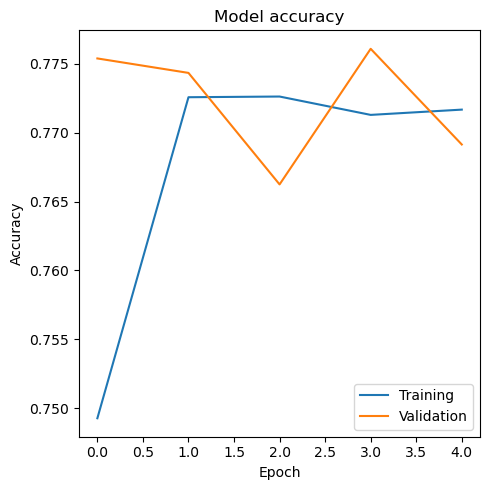

In [ ]:
# Model training
params   = dict(batch_size=64, validation_split=.25, epochs=5, verbose=1, callbacks=[callbacks.EarlyStopping(patience=3, restore_best_weights=True)])
training = model.fit(X_train, y_train, **params)
plot_history(history=training.history, metric='accuracy', validation=True)
del params

8. [Evaluate](https://keras.io/api/models/model_training_apis/) the model on the test sample and display a confusion matrix (see `metrics.confusion_matrix`) for the test sample.

Test loss: 0.1267
Test accuracy: 0.7700
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.85     14488
         1.0       0.64      0.38      0.48      5512

    accuracy                           0.77     20000
   macro avg       0.72      0.65      0.67     20000
weighted avg       0.75      0.77      0.75     20000



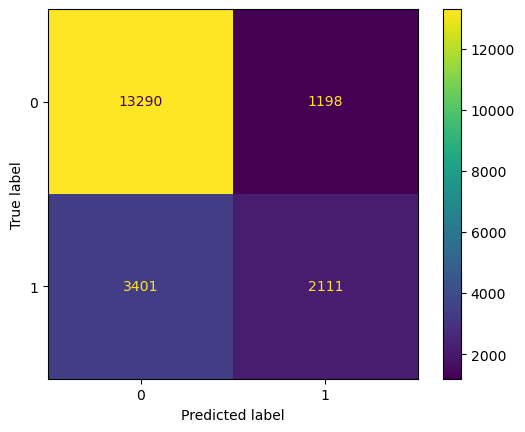

In [ ]:
# Model evaluation
print('Test loss: {:.4f}\nTest accuracy: {:.4f}'.format(*model.evaluate(X_test, y_test, verbose=0)))

# Confusion matrices
yh_test = model.predict(X_test, verbose=0).round()
cm_test = metrics.confusion_matrix(y_test, yh_test)
metrics.ConfusionMatrixDisplay(cm_test).plot()

# Statistics
print(metrics.classification_report(y_test, yh_test))
del yh_test, cm_test

9. Apply [regularisation](https://keras.io/api/layers/regularizers/) to the parameters in the hidden layers and improve the generalisation performance of the model.

In [ ]:
# Adds regularisation 
for layer in ['hidden_layer1', 'hidden_layer2']:
    model.get_layer(layer).kernel_regularizer = regularizers.l2() 
    model.get_layer(layer).bias_regularizer   = regularizers.l2() 
model.compile(loss=losses.MeanSquaredError(), optimizer=optimizers.legacy.Adam(learning_rate=0.001))

# Regularisation can also be added directly to the layer
inspect.signature(layers.Dense)

<Signature (units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)>

10. Modify the model structure to improve predictive performance.